# WeatherPy

---

## Code to Generate Random Geographic Coordinates and a List of Cities

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print (cities)

Number of cities in the list: 638
['hawaiian paradise park', 'adamstown', 'port-aux-francais', 'pitimbu', 'avarua', 'saint-pierre', 'raja', 'ilulissat', 'madruga', 'ust-nera', 'edinburgh of the seven seas', 'elliot lake', 'grytviken', 'margate', 'nuuk', 'college', 'bilibino', 'egilsstadir', 'surovikino', 'horasan', 'waitangi', 'ladario', 'vila franca do campo', 'lata', 'onega', 'bovril', 'mogocha', 'wailua homesteads', 'blackmans bay', 'remire-montjoly', 'puerto san carlos', 'kodiak', 'kakunodatemachi', "st. john's", 'bethel', "nar'yan-mar", 'arochukwu', 'holualoa', 'bredasdorp', 'whitehorse', 'alice springs', 'cassilandia', 'vrontados', 'rosarito', 'chipinge', 'lagoa', 'nemuro', 'hamilton', 'skeldon', 'langarud', 'fort irwin', 'ushuaia', 'gobabis', 'tiksi', 'taltal', 'arish', 'port elizabeth', 'iqaluit', 'albany', 'taulaga', 'touros', 'kalevala', 'tamandare', 'haiku-pauwela', 'anadyr', 'puerto ayora', 'jamestown', 'bedarieux', 'ad darb', 'toga village', 'margaret river', 'katsuura', '

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [14]:
#Testing API Code to retreive data
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
city_url = f"{url}appid={weather_api_key}&units={units}&q="
city_weather = requests.get(city_url + city).json()
city_weather

{'coord': {'lon': 148.6167, 'lat': -32.25},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 22.07,
  'feels_like': 21.25,
  'temp_min': 22.07,
  'temp_max': 22.07,
  'pressure': 1015,
  'humidity': 35},
 'visibility': 10000,
 'wind': {'speed': 5.66, 'deg': 350},
 'clouds': {'all': 49},
 'dt': 1696097006,
 'sys': {'type': 1,
  'id': 9596,
  'country': 'AU',
  'sunrise': 1696103048,
  'sunset': 1696147600},
 'timezone': 39600,
 'id': 2168305,
 'name': 'Dubbo',
 'cod': 200}

In [16]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q="
    
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hawaiian paradise park
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | pitimbu
Processing Record 5 of Set 1 | avarua
Processing Record 6 of Set 1 | saint-pierre
Processing Record 7 of Set 1 | raja
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | madruga
Processing Record 10 of Set 1 | ust-nera
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | elliot lake
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | margate
Processing Record 15 of Set 1 | nuuk
Processing Record 16 of Set 1 | college
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | egilsstadir
Processing Record 19 of Set 1 | surovikino
Processing Record 20 of Set 1 | horasan
Processing Record 21 of Set 1 | waitangi
Processing Record 22 of Set 1 | ladario
Proces

In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          609
Lat           609
Lng           609
Max Temp      609
Humidity      609
Cloudiness    609
Wind Speed    609
Country       609
Date          609
dtype: int64

In [28]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,24.46,92,100,2.57,US,1696097543
1,adamstown,-25.0660,-130.1015,20.53,88,100,11.86,PN,1696097543
2,port-aux-francais,-49.3500,70.2167,2.25,98,99,10.20,TF,1696097543
3,pitimbu,-7.4706,-34.8086,29.33,57,24,7.15,BR,1696097543
4,avarua,-21.2078,-159.7750,25.03,94,75,4.12,CK,1696097175
5,saint-pierre,-21.3393,55.4781,22.82,83,0,2.57,RE,1696097544
6,raja,8.4596,25.6780,22.99,94,78,0.97,SS,1696097544
7,ilulissat,69.2167,-51.1000,1.01,64,75,1.54,GL,1696097544
8,madruga,22.9114,-81.8561,31.52,55,30,1.34,CU,1696097176


In [22]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [23]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,24.46,92,100,2.57,US,1696097543
1,adamstown,-25.0660,-130.1015,20.53,88,100,11.86,PN,1696097543
2,port-aux-francais,-49.3500,70.2167,2.25,98,99,10.20,TF,1696097543
3,pitimbu,-7.4706,-34.8086,29.33,57,24,7.15,BR,1696097543
4,avarua,-21.2078,-159.7750,25.03,94,75,4.12,CK,1696097175


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [ ]:
#Get today's date
#https://docs.python.org/3/library/time.html
date = time.strftime("%m/%d/%y") 

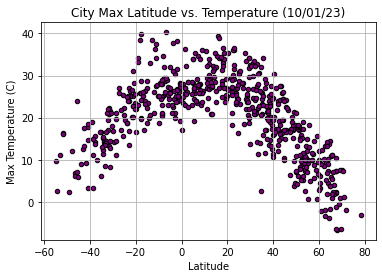

10/01/23


In [175]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties

lat_temp_plot = city_data_df.plot.scatter(x = 'Lat',
                          y = 'Max Temp', 
                          xlabel = 'Latitude', 
                          ylabel = 'Max Temperature (C)',
                          title = f'City Max Latitude vs. Temperature ({date})', 
                          color = 'purple',
                          edgecolor = 'black', 
                          grid = True)
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()
print(date)

#### Latitude Vs. Humidity

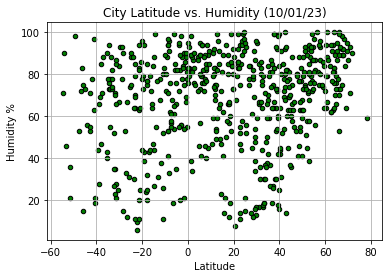

In [176]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
lat_humid_plot = city_data_df.plot.scatter(x = 'Lat',
                          y = 'Humidity', 
                          xlabel = 'Latitude', 
                          ylabel = 'Humidity %',
                          title = f'City Latitude vs. Humidity ({date})', 
                          color = 'green',
                          edgecolor = 'black', 
                          grid = True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

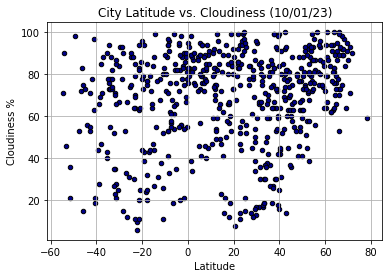

In [177]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
lat_cloud_plot = city_data_df.plot.scatter(x = 'Lat',
                          y = 'Humidity', 
                          xlabel = 'Latitude', 
                          ylabel = 'Cloudiness %',
                          title = f'City Latitude vs. Cloudiness ({date})', 
                          color = 'darkblue',
                          edgecolor = 'black', 
                          grid = True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

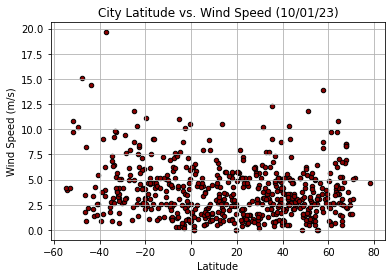

In [178]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
lat_wind_plot = city_data_df.plot.scatter(x = 'Lat',
                          y = 'Wind Speed', 
                          xlabel = 'Latitude', 
                          ylabel = 'Wind Speed (m/s)',
                          title = f'City Latitude vs. Wind Speed ({date})', 
                          color = 'darkred',
                          edgecolor = 'black', 
                          grid = True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [150]:
# Define a function to create Linear Regression plots
def lin_regress(x,y):
    correlation = st.pearsonr(x, y)
    print(f"The correlation between the two factors is {round(correlation[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y, color = "darkblue")
    plt.plot(x,regress_values, "g-")
    plt.annotate(f"Line equation: {line_eq}", xy=(-0.5, 0.5), xycoords='figure points')
    plt.xlabel("Latitude")
    return line_eq




In [43]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,24.46,92,100,2.57,US,1696097543
6,raja,8.4596,25.6780,22.99,94,78,0.97,SS,1696097544
7,ilulissat,69.2167,-51.1000,1.01,64,75,1.54,GL,1696097544
8,madruga,22.9114,-81.8561,31.52,55,30,1.34,CU,1696097176
9,ust-nera,64.5667,143.2000,-3.91,66,25,2.64,RU,1696097176


In [44]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,20.53,88,100,11.86,PN,1696097543
2,port-aux-francais,-49.3500,70.2167,2.25,98,99,10.20,TF,1696097543
3,pitimbu,-7.4706,-34.8086,29.33,57,24,7.15,BR,1696097543
4,avarua,-21.2078,-159.7750,25.03,94,75,4.12,CK,1696097175
5,saint-pierre,-21.3393,55.4781,22.82,83,0,2.57,RE,1696097544


###  Temperature vs. Latitude Linear Regression Plot

The correlation between the two factors is -0.81


Text(0.5, 1.0, 'Northern Hemisphere Max Temperatures (C)')

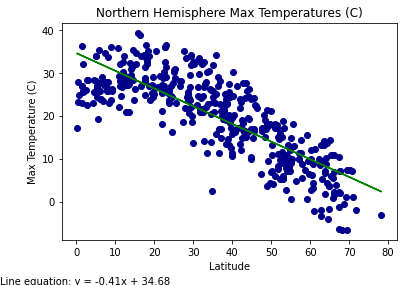

In [154]:
# Linear regression on Northern Hemisphere
lin_regress_nhemi = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.ylabel("Max Temperature (C)")
plt.title("Northern Hemisphere Max Temperatures (C)")

The correlation between the two factors is 0.74


Text(0.5, 1.0, 'Southern Hemisphere Max Temperatures (C)')

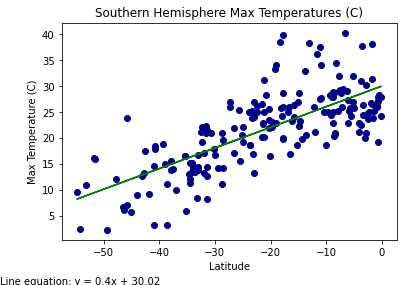

In [155]:
# Linear regression on Southern Hemisphere
lin_regress_shemi = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.ylabel("Max Temperature (C)")
plt.title("Southern Hemisphere Max Temperatures (C)")

**Discussion about the linear relationship:** 

There is a moderate, positive correlation between latitude and temperature in the Southern Hemisphere and strong, negative correlation between latitude and temperature in the Northern hemisphere. We may conclude that the latitude where one is located may effect temperatures. In the Northern hemisphere, the lower latitudes have higher temperatures while in the Southern hemisphere, the lower latitudes have lower temperatures. 

### Humidity vs. Latitude Linear Regression Plot

The correlation between the two factors is 0.12


Text(0.5, 1.0, 'Northern Hemisphere Humidity Levels')

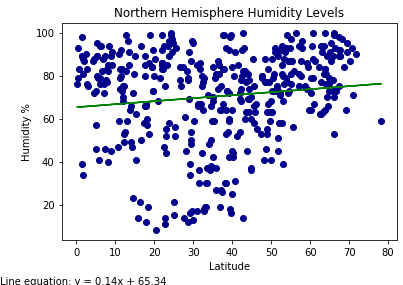

In [160]:
# Northern Hemisphere
lin_regress_nhemi = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.ylabel("Humidity %")
plt.title("Northern Hemisphere Humidity Levels")

The correlation between the two factors is 0.14


Text(0.5, 1.0, 'Southern Hemisphere Humidity Levels')

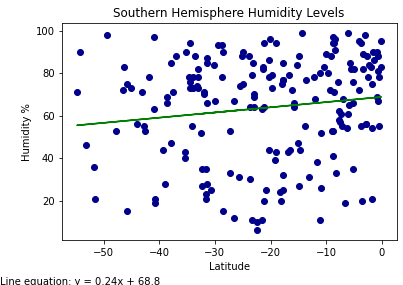

In [161]:
# Southern Hemisphere
lin_regress_shemi = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.ylabel("Humidity %")
plt.title("Southern Hemisphere Humidity Levels")

**Discussion about the linear relationship:** 
There is a weak positive correlation between humidity and latitude in both hemispheres. We may conclude that the latitude does not effect the humidity levels. 

### Cloudiness vs. Latitude Linear Regression Plot

The correlation between the two factors is 0.14


Text(0.5, 1.0, 'Northern Hemisphere Cloud Coverage')

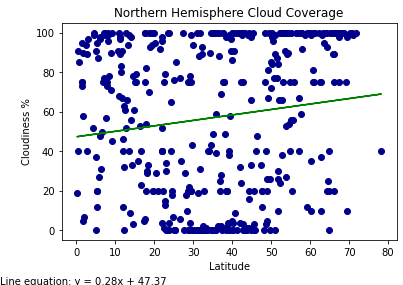

In [162]:
# Northern Hemisphere
lin_regress_nhemi = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.ylabel("Cloudiness %")
plt.title("Northern Hemisphere Cloud Coverage")

The correlation between the two factors is 0.1


Text(0.5, 1.0, 'Southern Hemisphere Cloud Coverage')

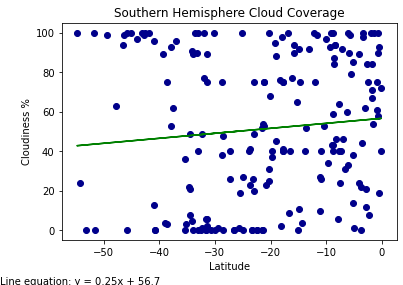

In [163]:
# Southern Hemisphere
lin_regress_nhemi = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.ylabel("Cloudiness %")
plt.title("Southern Hemisphere Cloud Coverage")

**Discussion about the linear relationship:** 
There is a weak positive correlation between cloudiness and latitude in both hemispheres. We may conclude that the latitude does not effect the amount of cloud coverage and other factors may be at play that effect cloud coverage. 

### Wind Speed vs. Latitude Linear Regression Plot

The correlation between the two factors is 0.11


Text(0.5, 1.0, 'Northern Hemisphere Wind Speeds')

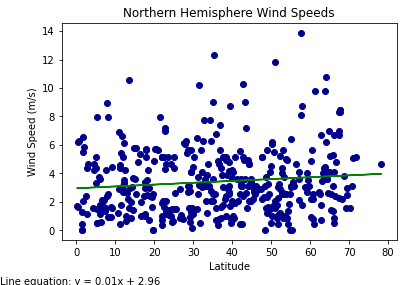

In [164]:
# Northern Hemisphere
lin_regress_nhemi = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.ylabel("Wind Speed (m/s)")
plt.title("Northern Hemisphere Wind Speeds")

The correlation between the two factors is -0.2


Text(0.5, 1.0, 'Southern Hemisphere Wind Speeds')

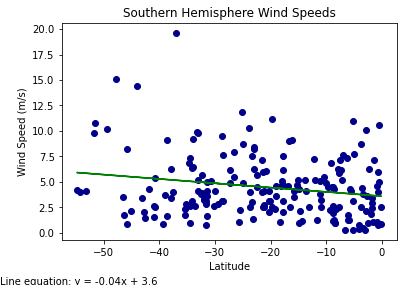

In [165]:
# Southern Hemisphere
lin_regress_nhemi = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.ylabel("Wind Speed (m/s)")
plt.title("Southern Hemisphere Wind Speeds")

**Discussion about the linear relationship:** There is a weak postive correlation between wind speeds and latitude in the Northern hemisphere and a weak negative correlation between wind speeds and latitude in the southern hemisphere. We may conclude that the latitude where one is located has a very weak effect on wind speeds and there may be other factors that effect wind speeds. 